<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg

--2019-04-07 03:19:56--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-04-07 03:19:56 (137 MB/s) - ‘imori.jpg’ saved [12638/12638]



#11

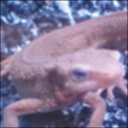

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

K_size = 3

pad = K_size // 2
out = np.zeros((H+pad*2, W+pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for h in range(H):
  for w in range(W):
    for c in range(C):
      out[h+pad, w+pad, c] = np.mean(tmp[h:h+K_size, w:w+K_size, c])
      
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

cv2.imwrite("out11.jpg", out)
cv2_imshow(out)

#12


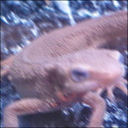

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H, W, C = img.shape

K_size = 3
K = np.diag( [1] * K_size ).astype(np.float)
K /= K_size

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for h in range(H):
  for w in range(W):
    for c in range(C):
        out[h+pad, w+pad, c] = np.sum(K * tmp[h:h+K_size, w:w+K_size, c])
        
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)
        
cv2.imwrite("out12.jpg", out)
cv2_imshow(out)

#13

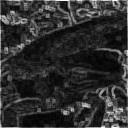

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

y = 0.2126*r + 0.7152*g + 0.0722*b

gray = y.astype(np.uint8)

K_size = 3

#zero padding
pad = K_size//2
out = np.zeros((H + pad*2, W + pad+2), dtype = np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

for h in range(H):
  for w in range(W):
    out[pad+h, pad+w] = np.max(tmp[h:h+K_size, w:w+K_size]) - np.min(tmp[h:h+K_size, w:w+K_size])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

cv2.imwrite("out13.jpg", out)
cv2_imshow(out)

#14 微分フィルタ

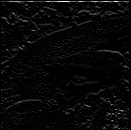

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

y = 0.2126*r + 0.7152*g + 0.0722*b

gray = y.astype(np.uint8)

K_size = 3

#zero padding
pad = K_size//2
out = np.zeros((H + pad*2, W + pad+2), dtype = np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_h = out.copy()
out_v = out.copy()

Kh = [[0., -1., 0.], [0., 1., 0.], [0., 0., 0.]]
Kv = [[0., 0., 0.],[-1., 1., 0],[0., 0., 0.]]

for y in range(H):
  for x in range(W):
    out_h[pad+y, pad+x] = np.sum(Kh * out[y:y+K_size, x:x+K_size])
    out_v[pad+y, pad+x] = np.sum(Kv * out[y:y+K_size, x:x+K_size])

    out_v[out_v < 0] = 0
    out_h[out_h < 0] = 0
    out_v[out_v > 255] = 255
    out_v[out_v > 255] = 255
    
out_h = out_h.astype(np.uint8)
out_v = out_v.astype(np.uint8)
cv2.imwrite("out14_h.jpg", out_h)
cv2.imwrite("out14_v.jpg", out_v)
cv2_imshow(out_h)

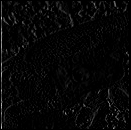

In [0]:
cv2_imshow(out_v)

#15 Sobelフィルタ


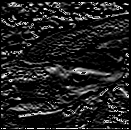

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

y = 0.2126*r + 0.7152*g + 0.0722*b

gray = y.astype(np.uint8)

K_size = 3

#zero padding
pad = K_size//2
out = np.zeros((H + pad*2, W + pad+2), dtype = np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_h = out.copy()
out_v = out.copy()

Kh = [[1., 2., 1.], [0., 0., 0.], [-1., -2., -1.]]
Kv = [[1., 0., -1.],[2., 0., -2],[1., 0., -1.]]

for y in range(H):
  for x in range(W):
    out_h[pad+y, pad+x] = np.sum(Kh * out[y:y+K_size, x:x+K_size])
    out_v[pad+y, pad+x] = np.sum(Kv * out[y:y+K_size, x:x+K_size])

    out_v[out_v < 0] = 0
    out_h[out_h < 0] = 0
    out_v[out_v > 255] = 255
    out_v[out_v > 255] = 255
    
out_h = out_h.astype(np.uint8)
out_v = out_v.astype(np.uint8)
cv2.imwrite("out15_h.jpg", out_h)
cv2.imwrite("out15_v.jpg", out_v)
cv2_imshow(out_h)

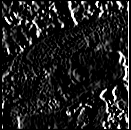

In [0]:
cv2_imshow(out_v)

#16 Prewittフィルタ

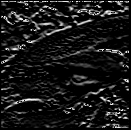

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

y = 0.2126*r + 0.7152*g + 0.0722*b

gray = y.astype(np.uint8)

K_size = 3

#zero padding
pad = K_size//2
out = np.zeros((H + pad*2, W + pad+2), dtype = np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_h = out.copy()
out_v = out.copy()

Kh = [[-1., -1., -1.], [0., 0., 0.], [1., 1., 1.]]
Kv = [[-1., 0., 1.],[-1., 0., 1],[-1., 0., 1.]]

for y in range(H):
  for x in range(W):
    out_h[pad+y, pad+x] = np.sum(Kh * out[y:y+K_size, x:x+K_size])
    out_v[pad+y, pad+x] = np.sum(Kv * out[y:y+K_size, x:x+K_size])

    out_v[out_v < 0] = 0
    out_h[out_h < 0] = 0
    out_v[out_v > 255] = 255
    out_v[out_v > 255] = 255
    
out_h = out_h.astype(np.uint8)
out_v = out_v.astype(np.uint8)
cv2.imwrite("out15_h.jpg", out_h)
cv2.imwrite("out15_v.jpg", out_v)
cv2_imshow(out_h)

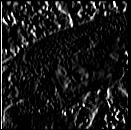

In [0]:
cv2_imshow(out_v)

#17 Laplacian フィルタ

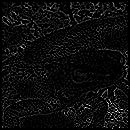

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H, W, C = img.shape

K_size = 3

gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

#zero padding
pad = K_size // 2
out = np.zeros((H+pad*2, W+pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)

tmp = out.copy()

K = [[0., 1., 0.], [1., -4., 1.], [0., 1., 0.]]

for y in range(H):
  for x in range(W):
    out[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])
    
out[out < 0] = 0
out[out > 255] = 255

out = out.astype(np.uint8)
cv2.imwrite("out17.jpg", out)
cv2_imshow(out)

#18 Embossフィルタ

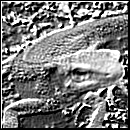

In [0]:
import cv2
import numpy as np

img  =cv2.imread("imori.jpg")
H, W, C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

gray = 0.2126 * r + 0.7152 * g + 0.0722 * b

K_size = 3
K = [[-2., -1., 0.], [-1., 1., 1.], [0., 1., 2.]]

pad = K_size // 2
out = np.zeros((H+pad*2, W+pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

for h in range(H):
  for w in range(W):
    out[pad+h, pad+w] = np.sum(K * tmp[h:K_size+h, w:K_size+w])
    
out[out < 0] = 0
out[out > 255] = 255

out = out.astype(np.uint8)

cv2.imwrite("out18.jpg", out)
cv2_imshow(out)
                

#19 LoGフィルタ

In [39]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_noise.jpg

--2019-04-07 06:53:57--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_noise.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14696 (14K) [image/jpeg]
Saving to: ‘imori_noise.jpg’

imori_noise.jpg     100%[===================>]  14.35K  --.-KB/s    in 0.006s  

2019-04-07 06:53:57 (2.16 MB/s) - ‘imori_noise.jpg’ saved [14696/14696]



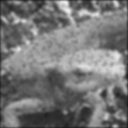

In [45]:
import cv2
import numpy as np

img = cv2.imread("imori_noise.jpg")
H, W, C = img.shape

b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

K_size = 5
s = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] =gray.copy().astype(np.float)
tmp = out.copy()

K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(-pad, -pad+K_size):
  for y in range(-pad, -pad+K_size):
    K[y+pad, x+pad] = (x**2 + y**2 - s**2)  * np.exp( -(x**2 + y**2) / (2 * s**2))
K /= (2 * np.pi * s**6)
K /= K.sum()


for y in range(H):
  for x in range(W):
    out[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])
    
out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

cv2.imwrite("out19.jpg", out)
cv2_imshow(out)

#20 ヒストグラム表示


In [37]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg

--2019-04-07 06:53:02--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5941 (5.8K) [image/jpeg]
Saving to: ‘imori_dark.jpg’

imori_dark.jpg      100%[===================>]   5.80K  --.-KB/s    in 0s      

2019-04-07 06:53:02 (86.4 MB/s) - ‘imori_dark.jpg’ saved [5941/5941]



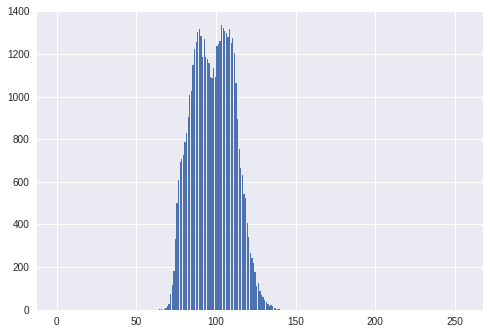

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori_dark.jpg").astype(np.float)

# Display histogram
plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("out.png")
plt.show()